# check z-score and features of galectin data



also see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3097418/ for suggestions on analysis of glycan arrays

## z-score as the statistical test for significance of a sample
In the paper by Cholleti and Cummings http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3459425/#SD2

> "To avoid using an arbitrary threshold in determining binders and non-binders, we used the z-score as the statistical test for significance of a sample. The z-score transformation is calculated by comparing the value of a sample, relative to the sample mean and standard deviation, with the null hypothesis being that a random sample pulled from the population would be a non-binder. If the converted p value is less than 0.15, the null hypothesis is rejected and the sample is considered a binding glycan. We used a non-conservative p value to allow more glycans in the list of candidate binders as an input to GLYMMR. The z-score transformation is based on the sum of the RFU intensity values for the three different concentrations of the glycan. This statistical test allows the program to discard not only non-binding glycans, but glycans that exhibit non-specific binding, which could distort the motif discovery algorithm. "

In [206]:
## House keeping tasks

In [207]:
%reset -f


### import all required dependencies

In [208]:
# standard imports
import urllib2
import os
import json
import StringIO
import pickle

# dataframe and numerical
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

#scipy
from scipy import stats
from scipy.special import erf
from scipy import sqrt


In [209]:
from IPython.display import HTML
def addToggle():
    return '''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.'''
HTML(addToggle())


In [210]:
## variables for this project

samples_in="../data/galectin-3/galectin-3_5.0_human.json"
results_dir = "../results/galectin-3/"
dataframe_out=results_dir+"dataframes_galectin.pkl"


## Load data from pickle

In [211]:
# Check whether or not the dataframes exist

subdir="./"
dataframefile=dataframe_out

if not os.path.isfile(dataframefile):
    print "calling the notebook that loads the data"
    %run download_cfg_for_sna.ipynb
with open(os.path.join(subdir, dataframefile)) as f:
    dataframes = pickle.load(f)


In [212]:
# peak at the data in frame 0 
frame=dataframes[0]["dataframe"]
frame.head()

,Chart Number,Structure on Masterlist,Average RFU,StDev,% CV
0,1,Gala-Sp8,32.573825,10.853264,33.318974
1,2,Glca-Sp8,32.550600,20.740342,63.717235
2,3,Mana-Sp8,43.420175,5.334342,12.285399
3,4,GalNAca-Sp8,18.625950,5.312952,28.524464
4,5,GalNAca-Sp15,36.695600,13.101250,35.702508


In [213]:
# recalculate CV
# rank the glycans by RFU
STDEV="StDev"
RFU="Average RFU"

frame["CV"]=100*frame[STDEV]/frame[RFU]
maxrfu=frame[RFU].max()
frame["rank"]=100*frame[RFU]/maxrfu
frame.head()


,Chart Number,Structure on Masterlist,Average RFU,StDev,% CV,CV,rank
0,1,Gala-Sp8,32.573825,10.853264,33.318974,33.318974,6.857336
1,2,Glca-Sp8,32.550600,20.740342,63.717235,63.717235,6.852447
2,3,Mana-Sp8,43.420175,5.334342,12.285399,12.285399,9.140674
3,4,GalNAca-Sp8,18.625950,5.312952,28.524464,28.524464,3.921075
4,5,GalNAca-Sp15,36.695600,13.101250,35.702508,35.702508,7.725039


In [214]:
# choose data to work with 
# ignore the 0.5 ug, use 2,5,10 ()
frames=[dataframes[1]["dataframe"],dataframes[2]["dataframe"], dataframes[3]["dataframe"]]
sample_keys=[dataframes[1]["sample"].encode('utf-8'),dataframes[2]["sample"].encode('utf-8'), dataframes[3]["sample"].encode('utf-8')]

# recalculate CV and rank the glycans by RFU
for frame in frames:
    frame["%CV"]=frame["% CV"]
    frame["CV"]=100*frame[STDEV]/frame[RFU]
    maxrfu=frame[RFU].max()
    frame["rank"]=100*frame[RFU]/maxrfu

# peak at all frames
result = pd.concat(frames, keys=sample_keys)
result

Chart Number  \
Galectin-3:Gal-3-2ug  0               1   
                      1               2   
                      2               3   
                      3               4   
                      4               5   
                      5               6   
                      6               7   
                      7               8   
                      8               9   
                      9              10   
                      10             11   
                      11             12   
                      12             13   
                      13             14   
                      14             15   
                      15             16   
                      16             17   
                      17             18   
                      18             19   
                      19             20   
                      20             21   
                      21             22   
                      22             23   
                      23             24   
                      24             25   
                      25             26   
                      26             27   
                      27             28   
                      28             29   
                      29             30   
                      30             31   
                      31             32   
                      32             33   
                      33             34   
                      34             35   
                      35             36   
                      36             37   
                      37             38   
                      38             39   
                      39             40   
                      40             41   
                      41             42   
                      42             43   
                      43             44   
                      44             45   
                      45             46   
                      46             47   
                      47             48   
                      48             49   
                      49             50   
                      50             51   
                      51             52   
                      52             53   
                      53             54   
                      54             55   
                      55             56   
                      56             57   
                      57             58   
                      58             59   
                      59             60   
                      60             61   
                      61             62   
                      62             63   
                      63             64   
                      64             65   
                      65             66   
                      66             67   
                      67             68   
                      68             69   
                      69             70   
                      70             71   
                      71             72   
                      72             73   
                      73             74   
                      74             75   
                      75             76   
                      76             77   
                      77             78   
                      78             79   
                      79             80   
                      80             81   
                      81             82   
                      82             83   
                      83             84   
                      84             85   
                      85             86   
                      86             87   
                      87             88   
                      88             89   
                      89             90   
                      90             91   
                      91             92   
                      92    

## RFU, zscore and p-value
Must convert from z-score to p-value.
In the paper, the RFU is summed across all datasets and this is used to calculate a p-value

In [215]:
# calculate rank, %CV for all frames, z-score, p-value for all frames and sort by average rank
Structure="Structure on Masterlist"

for aframe in frames:
    aframe["CV"]=100*aframe[STDEV]/aframe[RFU]
    maxrfu=aframe[RFU].max()
    aframe["rank"]=100*aframe[RFU]/maxrfu
    aframe["z-score"]=stats.zscore(aframe[RFU])
    aframe["p-value"]=1- 0.5 * (1 + erf(aframe["z-score"] / sqrt(2)))

#. merge_frames
df_final = reduce(lambda left,right: pd.merge(left,right,on=[Structure,'Chart Number']), frames)
df_final


,Chart Number,Structure on Masterlist,Average RFU_x,StDev_x,% CV_x,%CV_x,CV_x,rank_x,z-score_x,p-value_x,Average RFU_y,StDev_y,% CV_y,%CV_y,CV_y,rank_y,z-score_y,p-value_y,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value
0,1,Gala-Sp8,22.204725,15.438527,69.528118,69.528118,69.528118,0.045785,-0.174604,5.693044e-01,52.485175,33.166281,63.191712,63.191712,63.191712,0.102046,-0.204502,5.810193e-01,38.016650,26.597865,69.963726,69.963726,69.963726,0.064256,-0.249901,5.986681e-01
1,2,Glca-Sp8,25.108575,14.682871,58.477517,58.477517,58.477517,0.051773,-0.174156,5.691286e-01,44.461175,27.606303,62.090808,62.090808,62.090808,0.086445,-0.205498,5.814086e-01,37.200075,14.637688,39.348544,39.348544,39.348544,0.062876,-0.249985,5.987007e-01
2,3,Mana-Sp8,23.946725,11.615297,48.504742,48.504742,48.504742,0.049377,-0.174335,5.691990e-01,53.088925,17.977428,33.862859,33.862859,33.862859,0.103220,-0.204427,5.809900e-01,34.368050,11.054863,32.166104,32.166104,32.166104,0.058089,-0.250278,5.988139e-01
3,4,GalNAca-Sp8,63.695475,53.162320,83.463260,83.463260,83.463260,0.131337,-0.168212,5.667916e-01,7.977300,2.691994,33.745676,33.745676,33.745676,0.015510,-0.210030,5.831781e-01,24.777000,12.647052,51.043515,51.043515,51.043515,0.041878,-0.251270,5.991973e-01
4,5,GalNAca-Sp15,39.813700,14.504819,36.431729,36.431729,36.431729,0.082094,-0.171891,5.682383e-01,41.152075,34.473506,83.771004,83.771004,83.771004,0.080011,-0.205909,5.815692e-01,29.663750,12.108155,40.818018,40.818018,40.818018,0.050138,-0.250765,5.990020e-01
5,6,Fuca-Sp8,12.998850,8.169681,62.849259,62.849259,62.849259,0.026803,-0.176022,5.698616e-01,14.607175,13.794640,94.437426,94.437426,94.437426,0.028401,-0.209207,5.828566e-01,23.581600,8.756637,37.133346,37.133346,37.133346,0.039858,-0.251394,5.992451e-01
6,7,Fuca-Sp9,85.768275,12.030931,14.027250,14.027250,14.027250,0.176851,-0.164811,5.654538e-01,69.055550,14.526369,21.035774,21.035774,21.035774,0.134264,-0.202443,5.802149e-01,84.610300,26.679413,31.532110,31.532110,31.532110,0.143009,-0.245084,5.968041e-01
7,8,Rhaa-Sp8,21.344650,20.200658,94.640379,94.640379,94.640379,0.044012,-0.174736,5.693565e-01,25.466325,13.897310,54.571321,54.571321,54.571321,0.049514,-0.207858,5.823301e-01,40.887900,14.633928,35.790364,35.790364,35.790364,0.069109,-0.249604,5.985533e-01
8,9,Neu5Aca-Sp8,13.201150,0.243917,1.847697,1.847697,1.847697,0.027220,-0.175991,5.698493e-01,20.509250,5.013572,24.445421,24.445421,24.445421,0.039876,-0.208474,5.825705e-01,28.233200,6.224993,22.048485,22.048485,22.048485,0.047720,-0.250913,5.990592e-01
9,10,Neu5Aca-Sp11,11.513900,11.180614,97.105362,97.105362,97.105362,0.023741,-0.176251,5.699514e-01,12.400600,5.811093,46.861385,46.861385,46.861385,0.024110,-0.209481,5.829636e-01,33.932150,43.039246,126.839137,126.839137,126.839137,0.057353,-0.250323,5.988314e-01


In [216]:

#. calculate the average rank

df_final["avg_rank"]=df_final.filter(regex=("rank.*")).sum(axis=1)/df_final.filter(regex=("rank.*")).shape[1]  # http://stackoverflow.com/questions/30808430/how-to-select-columns-from-dataframe-by-regex


#. calculate the summed RFU

df_final["summed_RFU"]=df_final.filter(regex=("RFU.*")).sum(axis=1)


#. calculate the z-score and p-value for the summed RFU
df_final.head()
df_final["summed_RFU_z-score"]=stats.zscore(df_final["summed_RFU"])
df_final["summed_RFU_p-value"]=1- 0.5 * (1 + erf(df_final["summed_RFU_z-score"] / sqrt(2)))
df_final.sort_values("avg_rank",ascending=False)
#frames_RFU_sum["p-value_them"]=1- 0.5 * (1 + erf(frames_RFU_sum["stats_z-score"] / sqrt(2)))

,Chart Number,Structure on Masterlist,Average RFU_x,StDev_x,% CV_x,%CV_x,CV_x,rank_x,z-score_x,p-value_x,Average RFU_y,StDev_y,% CV_y,%CV_y,CV_y,rank_y,z-score_y,p-value_y,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value,avg_rank,summed_RFU,summed_RFU_z-score,summed_RFU_p-value
581,582,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,48497.554725,2540.454156,5.238314,5.238314,5.238314,100.000000,7.293212,1.513234e-13,50744.806600,2376.075114,4.682401,4.682401,4.682401,98.662372,6.092513,5.557579e-10,58791.030850,3408.913618,5.798357,5.798357,5.798357,99.369341,5.824807,2.858929e-09,99.343904,158033.392175,6.521992,3.469003e-11
550,551,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,45404.728150,975.976973,2.149505,2.149505,2.149505,93.622716,6.816750,4.656164e-12,51432.786025,2519.588174,4.898798,4.898798,4.898798,100.000000,6.177974,3.246463e-10,59164.155125,5319.241163,8.990648,8.990648,8.990648,100.000000,5.863386,2.267611e-09,97.874239,156001.669300,6.435228,6.164402e-11
580,581,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,47660.952450,3585.490641,7.522910,7.522910,7.522910,98.274960,7.164330,3.907985e-13,45579.427500,1258.057277,2.760143,2.760143,2.760143,88.619402,5.450868,2.506222e-08,56434.799450,5890.807902,10.438254,10.438254,10.438254,95.386809,5.581187,1.194413e-08,94.093724,149675.179400,6.165059,3.522846e-10
565,566,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,45403.955450,893.050601,1.966900,1.966900,1.966900,93.621123,6.816631,4.660050e-12,46248.923525,2301.637782,4.976630,4.976630,4.976630,89.921093,5.534033,1.564747e-08,55592.546400,3504.067093,6.303124,6.303124,6.303124,93.963222,5.494103,1.963505e-08,92.501813,147245.425375,6.061298,6.751384e-10
564,565,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,43160.712075,1937.406194,4.488819,4.488819,4.488819,88.995646,6.471051,4.866196e-11,45598.301975,1082.057787,2.373022,2.373022,2.373022,88.656100,5.453213,2.473388e-08,52198.568450,4384.313304,8.399298,8.399298,8.399298,88.226678,5.143186,1.350588e-07,88.626141,140957.582500,5.792779,3.461560e-09
588,589,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,46508.940550,1609.012847,3.459578,3.459578,3.459578,95.899558,6.986858,1.405542e-12,45723.137375,1026.315294,2.244630,2.244630,2.244630,88.898815,5.468720,2.266485e-08,47465.923725,406.663701,0.856749,0.856749,0.856749,80.227502,4.653859,1.628896e-06,88.341958,139698.001650,5.738989,4.762163e-09
578,579,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,38249.416525,2376.118263,6.212169,6.212169,6.212169,78.868753,5.714447,5.503082e-09,46458.228325,2219.603767,4.777633,4.777633,4.777633,90.328042,5.560033,1.348616e-08,46883.267500,2142.495349,4.569851,4.569851,4.569851,79.242689,4.593616,2.178153e-06,82.813161,131590.912350,5.392781,3.468780e-08
587,588,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,37301.991025,4309.906449,11.554092,11.554092,11.554092,76.915200,5.568492,1.284767e-08,46751.582325,1857.118417,3.972311,3.972311,3.972311,90.898405,5.596474,1.093777e-08,46811.240425,1933.619898,4.130674,4.130674,4.130674,79.120948,4.586169,2.257267e-06,82.311518,130864.813775,5.361773,4.120451e-08
579,580,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,36032.395575,2249.918703,6.244155,6.244155,6.244155,74.297345,5.372906,3.873889e-08,42810.283875,925.636836,2.162183,2.162183,2.162183,83.235397,5.106885,1.637568e-07,50729.529875,2784.204071,5.488330,5.488330,5.488330,85.743690,4.991296,2.998768e-07,81.092144,129572.209325,5.306573,5.585267e-08
568,569,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,43184.866375,614.410075,1.422744,1.422744,1.422744,89.045451,6.474772,4.747769e-11,40739.360500,5660.171098,13.893618,13.893618,13.893618,79.208932,4.849634,6.184478e-07,44313.602025,1348.341585,3.042726,3.042726,3.042726,74.899408,4.327928,7.525928e-06,81.051264,128237.828900,5.249589,7.621938e-08


## extract only the high binders 



In [217]:
#. extract the high binders. p-value < 0.15

df_final_high_binders = df_final[df_final["summed_RFU_p-value"] <0.15]
df_final_high_binders.sort_values("avg_rank",ascending=False)
#print df_final_high_binders.shape




,Chart Number,Structure on Masterlist,Average RFU_x,StDev_x,% CV_x,%CV_x,CV_x,rank_x,z-score_x,p-value_x,Average RFU_y,StDev_y,% CV_y,%CV_y,CV_y,rank_y,z-score_y,p-value_y,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value,avg_rank,summed_RFU,summed_RFU_z-score,summed_RFU_p-value
581,582,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,48497.554725,2540.454156,5.238314,5.238314,5.238314,100.000000,7.293212,1.513234e-13,50744.806600,2376.075114,4.682401,4.682401,4.682401,98.662372,6.092513,5.557579e-10,58791.030850,3408.913618,5.798357,5.798357,5.798357,99.369341,5.824807,2.858929e-09,99.343904,158033.392175,6.521992,3.469003e-11
550,551,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,45404.728150,975.976973,2.149505,2.149505,2.149505,93.622716,6.816750,4.656164e-12,51432.786025,2519.588174,4.898798,4.898798,4.898798,100.000000,6.177974,3.246463e-10,59164.155125,5319.241163,8.990648,8.990648,8.990648,100.000000,5.863386,2.267611e-09,97.874239,156001.669300,6.435228,6.164402e-11
580,581,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,47660.952450,3585.490641,7.522910,7.522910,7.522910,98.274960,7.164330,3.907985e-13,45579.427500,1258.057277,2.760143,2.760143,2.760143,88.619402,5.450868,2.506222e-08,56434.799450,5890.807902,10.438254,10.438254,10.438254,95.386809,5.581187,1.194413e-08,94.093724,149675.179400,6.165059,3.522846e-10
565,566,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,45403.955450,893.050601,1.966900,1.966900,1.966900,93.621123,6.816631,4.660050e-12,46248.923525,2301.637782,4.976630,4.976630,4.976630,89.921093,5.534033,1.564747e-08,55592.546400,3504.067093,6.303124,6.303124,6.303124,93.963222,5.494103,1.963505e-08,92.501813,147245.425375,6.061298,6.751384e-10
564,565,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,43160.712075,1937.406194,4.488819,4.488819,4.488819,88.995646,6.471051,4.866196e-11,45598.301975,1082.057787,2.373022,2.373022,2.373022,88.656100,5.453213,2.473388e-08,52198.568450,4384.313304,8.399298,8.399298,8.399298,88.226678,5.143186,1.350588e-07,88.626141,140957.582500,5.792779,3.461560e-09
588,589,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,46508.940550,1609.012847,3.459578,3.459578,3.459578,95.899558,6.986858,1.405542e-12,45723.137375,1026.315294,2.244630,2.244630,2.244630,88.898815,5.468720,2.266485e-08,47465.923725,406.663701,0.856749,0.856749,0.856749,80.227502,4.653859,1.628896e-06,88.341958,139698.001650,5.738989,4.762163e-09
578,579,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,38249.416525,2376.118263,6.212169,6.212169,6.212169,78.868753,5.714447,5.503082e-09,46458.228325,2219.603767,4.777633,4.777633,4.777633,90.328042,5.560033,1.348616e-08,46883.267500,2142.495349,4.569851,4.569851,4.569851,79.242689,4.593616,2.178153e-06,82.813161,131590.912350,5.392781,3.468780e-08
587,588,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,37301.991025,4309.906449,11.554092,11.554092,11.554092,76.915200,5.568492,1.284767e-08,46751.582325,1857.118417,3.972311,3.972311,3.972311,90.898405,5.596474,1.093777e-08,46811.240425,1933.619898,4.130674,4.130674,4.130674,79.120948,4.586169,2.257267e-06,82.311518,130864.813775,5.361773,4.120451e-08
579,580,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,36032.395575,2249.918703,6.244155,6.244155,6.244155,74.297345,5.372906,3.873889e-08,42810.283875,925.636836,2.162183,2.162183,2.162183,83.235397,5.106885,1.637568e-07,50729.529875,2784.204071,5.488330,5.488330,5.488330,85.743690,4.991296,2.998768e-07,81.092144,129572.209325,5.306573,5.585267e-08
568,569,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,43184.866375,614.410075,1.422744,1.422744,1.422744,89.045451,6.474772,4.747769e-11,40739.360500,5660.171098,13.893618,13.893618,13.893618,79.208932,4.849634,6.184478e-07,44313.602025,1348.341585,3.042726,3.042726,3.042726,74.899408,4.327928,7.525928e-06,81.051264,128237.828900,5.249589,7.621938e-08


In [218]:
high_binders= set(df_final_high_binders["Chart Number"])
high_binders

{75,
 163,
 185,
 372,
 543,
 545,
 547,
 549,
 550,
 551,
 552,
 565,
 566,
 569,
 572,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589}

In [219]:
df_final[df_final["Chart Number"]==582]

,Chart Number,Structure on Masterlist,Average RFU_x,StDev_x,% CV_x,%CV_x,CV_x,rank_x,z-score_x,p-value_x,Average RFU_y,StDev_y,% CV_y,%CV_y,CV_y,rank_y,z-score_y,p-value_y,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value,avg_rank,summed_RFU,summed_RFU_z-score,summed_RFU_p-value
581,582,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,48497.554725,2540.454156,5.238314,5.238314,5.238314,100.0,7.293212,1.513234e-13,50744.8066,2376.075114,4.682401,4.682401,4.682401,98.662372,6.092513,5.557579e-10,58791.03085,3408.913618,5.798357,5.798357,5.798357,99.369341,5.824807,2.858929e-09,99.343904,158033.392175,6.521992,3.469003e-11


# What about the % CV?
See https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3097418/

There are three statements made about %CV
 - >50% the data should be disregarded
 - >20-40% the CV is high and the results for binding may not be reliable
 - >30% when binding is low with high imprecision the data are classified as inconclusive.

## comparing % CV with the high binders from z-scores.


In [220]:
#. lets pull out any %CV column of df_final and ensure CV <20
#.. remember there are negative CV in this sample, exclude these 
df_cv_20=df_final.filter(regex=("%CV.*")) <=20
df_cv_0=df_final.filter(regex=("%CV.*")) >0

df_cv_0_20=(df_cv_0 & df_cv_20)


#print df_cv_0_20.head(340)
andmask=df_cv_0_20["%CV_x"]&df_cv_0_20["%CV_y"]&df_cv_0_20["%CV"]
ormask=df_cv_0_20["%CV_x"]|df_cv_0_20["%CV_y"]|df_cv_0_20["%CV"]

ormask1=df_cv_0_20["%CV"]
ormask2=df_cv_0_20["%CV_x"]
ormask3=df_cv_0_20["%CV_y"]
#mask

glycan_ids_cv_20=df_final["Chart Number"][andmask]
print len(glycan_ids_cv_20)

21


In [221]:
df_final_high_binders.sort_values("avg_rank",ascending=False)["Chart Number"]

581    582
550    551
580    581
565    566
564    565
588    589
578    579
587    588
579    580
568    569
548    549
577    578
546    547
586    587
576    577
549    550
584    585
542    543
585    586
544    545
371    372
575    576
582    583
583    584
74      75
571    572
162    163
184    185
551    552
Name: Chart Number, dtype: int64

In [222]:
sample_keys

['Galectin-3:Gal-3-2ug', 'Galectin-3:Gal-3-5ug', 'Galectin-3:Gal-3-10ug']

In [223]:
glycan_ids_cv_20_1= df_final[ormask1].sort_values("avg_rank",ascending=False)
print len(glycan_ids_cv_20_1)

91


In [224]:
glycan_ids_cv_20_2= df_final[ormask2].sort_values("avg_rank",ascending=False)
print len(glycan_ids_cv_20_2)

66


In [225]:
glycan_ids_cv_20_3= df_final[ormask3].sort_values("avg_rank",ascending=False)
print len(glycan_ids_cv_20_3)

61


## pull out the highbinders for the chosen 3 sample  keys

- these should be 2,5,10, but this is manually coded so watch out

In [226]:
#glycan_ids_cv_20_1.sort_values("rank",ascending=False)
twomg_glycans=glycan_ids_cv_20_1[glycan_ids_cv_20_1["p-value"] <0.15]["Chart Number"]
twomg_glycans
#print(len(glycan_ids_cv_20_1[glycan_ids_cv_20_1["p-value"] <0.15]))

581    582
550    551
580    581
565    566
564    565
588    589
578    579
587    588
579    580
568    569
548    549
577    578
546    547
586    587
576    577
549    550
584    585
542    543
585    586
544    545
371    372
575    576
582    583
583    584
74      75
571    572
162    163
184    185
551    552
335    336
336    337
Name: Chart Number, dtype: int64

In [227]:
#glycan_ids_cv_20_1.sort_values("rank",ascending=False)
fivemg_glycans=glycan_ids_cv_20_2[glycan_ids_cv_20_2["p-value_x"] <0.15]["Chart Number"]
#print(len(glycan_ids_cv_20_2[glycan_ids_cv_20_2["p-value_x"] <0.15]))
fivemg_glycans

581    582
550    551
580    581
565    566
564    565
588    589
578    579
587    588
579    580
568    569
548    549
577    578
546    547
576    577
549    550
542    543
Name: Chart Number, dtype: int64

In [234]:
#glycan_ids_cv_20_1.sort_values("rank",ascending=False)
tenmg_glycans=glycan_ids_cv_20_3[glycan_ids_cv_20_3["p-value_y"] <0.15]["Chart Number"]
#print(len(glycan_ids_cv_20_3[glycan_ids_cv_20_3["p-value_y"] <0.15]))
set(tenmg_glycans)
#glycan_ids_cv_20_3[glycan_ids_cv_20_3["p-value_y"] <0.15]

{372,
 543,
 547,
 549,
 550,
 551,
 565,
 566,
 569,
 577,
 578,
 579,
 580,
 581,
 582,
 584,
 585,
 586,
 587,
 588,
 589}

In [229]:
# see http://pandas.pydata.org/pandas-docs/stable/options.html for pandas options
pd.set_option('display.max_columns',1000)
pd.set_option('max_columns', 100)
df_final[df_final["Chart Number"]==340]

,Chart Number,Structure on Masterlist,Average RFU_x,StDev_x,% CV_x,%CV_x,CV_x,rank_x,z-score_x,p-value_x,Average RFU_y,StDev_y,% CV_y,%CV_y,CV_y,rank_y,z-score_y,p-value_y,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value,avg_rank,summed_RFU,summed_RFU_z-score,summed_RFU_p-value
339,340,GlcNAca1-4Galb1-4GlcNAcb-Sp0,20.38075,9.843628,48.298656,48.298656,48.298656,0.042024,-0.174885,0.569415,77.7565,62.915127,80.913013,80.913013,80.913013,0.151181,-0.201362,0.579792,18.33525,5.965515,32.535771,32.535771,32.535771,0.03099,-0.251936,0.599455,0.074732,116.4725,-0.221759,0.587749


## A consideration of the glycans by %CV for the first frame

In [230]:
# make various views of frame 0 based on the %CV
df_cv_50 = frame[frame.CV <50]
df_cv_30 = frame[frame.CV <30]
df_cv_20 = frame[frame.CV <20]
df_cv_20_0 = df_cv_20[df_cv_20.CV>0]

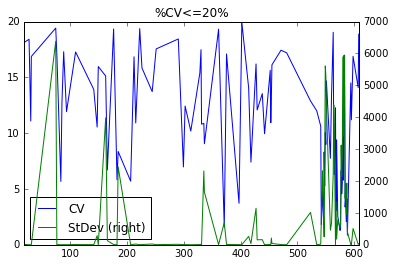

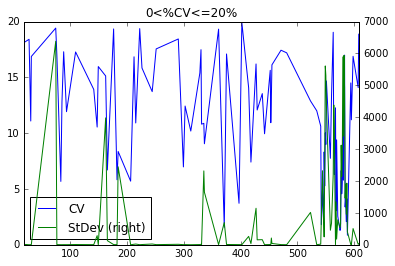

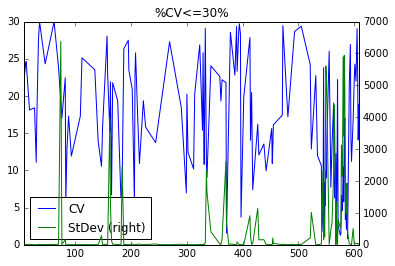

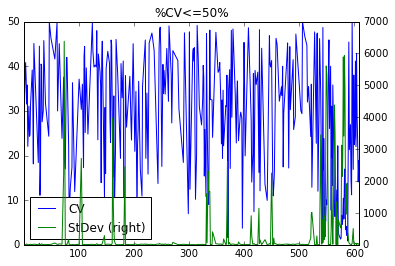

In [231]:
# plot rank v %CV
# plot comparison of different %CV subsets
plt.figure()
df_cv_20["CV"].plot(legend=True, title='%CV<=20%')
df_cv_20[STDEV].plot(secondary_y=True, style='g', legend=True)
plt.figure()
df_cv_20_0["CV"].plot(legend=True, title='0<%CV<=20%')
df_cv_20_0[STDEV].plot(secondary_y=True, style='g', legend=True)
plt.figure()
df_cv_30["CV"].plot(legend=True, title='%CV<=30%')
df_cv_30[STDEV].plot(secondary_y=True, style='g', legend=True)
plt.figure()
df_cv_50["CV"].plot(legend=True, title='%CV<=50%')
df_cv_50[STDEV].plot(secondary_y=True, style='g', legend=True)

In [232]:
# use 0<cv<20 and order by rank
pd.set_option('max_rows', 300)
df_cv_20_0.sort_values("rank",ascending=False)


,Chart Number,Structure on Masterlist,Average RFU,StDev,% CV,%CV,CV,rank,z-score,p-value
550,551,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,59164.155125,5319.241163,8.990648,8.990648,8.990648,100.000000,5.863386,2.267611e-09
581,582,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,58791.030850,3408.913618,5.798357,5.798357,5.798357,99.369341,5.824807,2.858929e-09
580,581,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,56434.799450,5890.807902,10.438254,10.438254,10.438254,95.386809,5.581187,1.194413e-08
549,550,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,55945.325300,5608.940170,10.025753,10.025753,10.025753,94.559493,5.530578,1.595884e-08
565,566,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,55592.546400,3504.067093,6.303124,6.303124,6.303124,93.963222,5.494103,1.963505e-08
564,565,GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Ga...,52198.568450,4384.313304,8.399298,8.399298,8.399298,88.226678,5.143186,1.350588e-07
579,580,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,50729.529875,2784.204071,5.488330,5.488330,5.488330,85.743690,4.991296,2.998768e-07
544,545,Fuca1-2Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-2Mana1...,47568.118075,2323.751763,4.885103,4.885103,4.885103,80.400232,4.664426,1.547402e-06
588,589,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,47465.923725,406.663701,0.856749,0.856749,0.856749,80.227502,4.653859,1.628896e-06
577,578,Galb1-4GlcNAcb1-3Galb1-4GlcNAcb1-3Galb1-4GlcNA...,47007.944775,3124.496944,6.646742,6.646742,6.646742,79.453420,4.606507,2.047447e-06


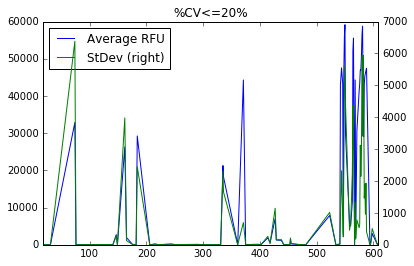

In [233]:
plt.figure()
df_cv_20[RFU].plot(legend=True, title='%CV<=20%')
df_cv_20[STDEV].plot(secondary_y=True, style='g', legend=True)

